<img src="https://cdn.siberian.dev/siberian.png" alt="Siberian Logo">

RadiusNeighborsClassifier with StandardScaler & Quantile Transformer

This Code template is for the Classification task using a simple Radius Neighbor Classifier using Standard Scaler with pipeline and Quantile Transformer Feature Transformation. It implements learning based on the number of neighbors within a fixed radius r of each training point, where r is a floating-point value specified by the user.

## Required Packages

In [ ]:
!pip install imblearn

In [ ]:
import numpy as np
import pandas as pd
import seaborn as se
import warnings
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import RadiusNeighborsClassifier
from imblearn.over_sampling import RandomOverSampler
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import LabelEncoder, QuantileTransformer, StandardScaler
from sklearn.metrics import classification_report,plot_confusion_matrix
warnings.filterwarnings('ignore')

## Initialization

Filepath of CSV file

In [ ]:
#filepath
file_path= ""

List of features which are required for model training 

In [ ]:
#x_values
features=[]

Target feature for prediction

In [ ]:
#y_value
target=''

## Data Fetching

Pandas is an open-source, BSD-licensed library providing high-performance, easy-to-use data manipulation and data analysis tools.

We will use panda's library to read the CSV file using its storage path.And we use the head function to display the initial row or entry.

In [ ]:
df=pd.read_csv(file_path)
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa


## Feature Selections

It is the process of reducing the number of input variables when developing a predictive model. Used to reduce the number of input variables to both reduce the computational cost of modelling and, in some cases, to improve the performance of the model.

We will assign all the required input features to X and target/outcome to Y.

In [ ]:
X=df[features]
Y=df[target]

## Data Preprocessing

Since the majority of the machine learning models in the Sklearn library doesn't handle string category data and Null value, we have to explicitly remove or replace null values. The below snippet have functions, which removes the null value if any exists. And convert the string classes data in the datasets by encoding them to integer classes

In [ ]:
def NullClearner(df):
    if(isinstance(df, pd.Series) and (df.dtype in ["float64","int64"])):
        df.fillna(df.mean(),inplace=True)
        return df
    elif(isinstance(df, pd.Series)):
        df.fillna(df.mode()[0],inplace=True)
        return df
    else:return df
def EncodeX(df):
    return pd.get_dummies(df)
def EncodeY(df):
    if len(df.unique())<=2:
        return df
    else:
        un_EncodedT=np.sort(pd.unique(df), axis=-1, kind='mergesort')
        df=LabelEncoder().fit_transform(df)
        EncodedT=[xi for xi in range(len(un_EncodedT))]
        print("Encoded Target: {} to {}".format(un_EncodedT,EncodedT))
        return df

Calling preprocessing functions on the feature and target set.

In [ ]:
x=X.columns.to_list()
for i in x:
    X[i]=NullClearner(X[i])
X=EncodeX(X)
Y=EncodeY(NullClearner(Y))
X.head()

Encoded Target: ['Iris-setosa' 'Iris-versicolor' 'Iris-virginica'] to [0, 1, 2]


,sepal_length,sepal_width,petal_length,petal_width
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


## Correlation Map

In order to check the correlation between the features, we will plot a correlation matrix. It is effective in summarizing a large amount of data where the goal is to see patterns.

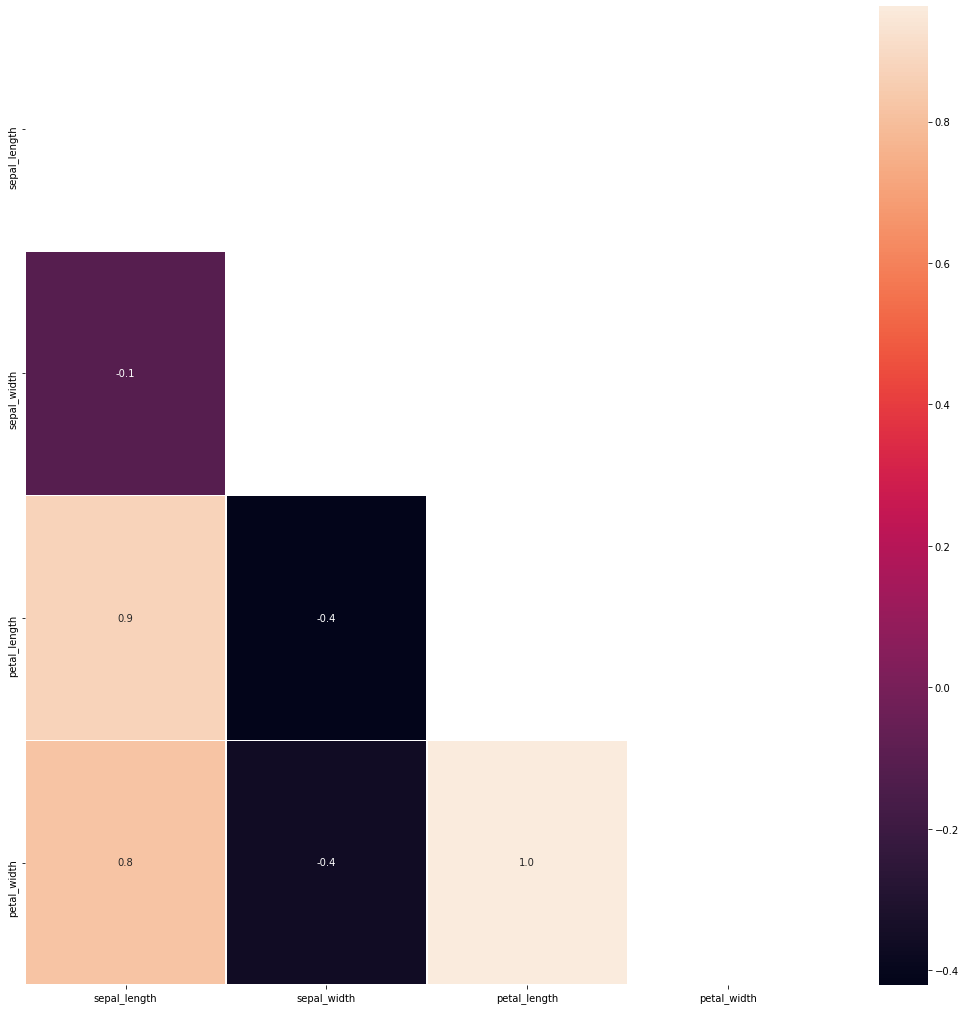

In [ ]:
f,ax = plt.subplots(figsize=(18, 18))
matrix = np.triu(X.corr())
se.heatmap(X.corr(), annot=True, linewidths=.5, fmt= '.1f',ax=ax, mask=matrix)
plt.show()

## Distribution Of Target Variable

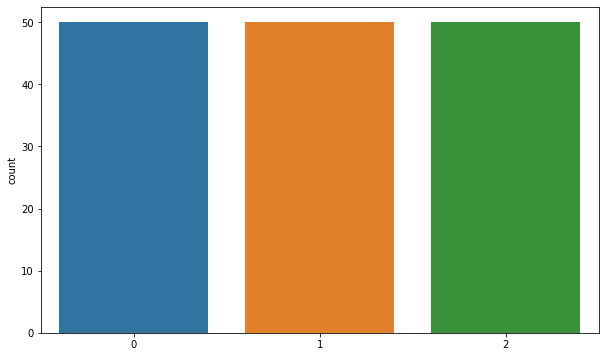

In [ ]:
plt.figure(figsize = (10,6))
se.countplot(Y)

## Data Splitting

The train-test split is a procedure for evaluating the performance of an algorithm. The procedure involves taking a dataset and dividing it into two subsets. The first subset is utilized to fit/train the model. The second subset is used for prediction. The main motive is to estimate the performance of the model on new data.

In [ ]:
x_train,x_test,y_train,y_test=train_test_split(X,Y,test_size=0.2,random_state=123)

## Handling Target Imbalance

The challenge of working with imbalanced datasets is that most machine learning techniques will ignore, and in turn have poor performance on, the minority class, although typically it is performance on the minority class that is most important.

One approach to addressing imbalanced datasets is to oversample the minority class. The simplest approach involves duplicating examples in the minority class.We will perform overspampling using imblearn library.

In [ ]:
x_train,y_train = RandomOverSampler(random_state=123).fit_resample(x_train, y_train)

## Data Rescaling

Standardize features by removing the mean and scaling to unit variance

The standard score of a sample x is calculated as:

z = (x - u) / s

where u is the mean of the training samples or zero if with_mean=False, and s is the standard deviation of the training samples or one if with_std=False.

<a href="https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.StandardScaler.html">More about StandardScaler</a>

## Feature Transformation
QuantileTransformer method transforms features in a way that follows a uniform or a normal distribution, which results in an increase in the frequency of values for any given feature. In the first step, values are mapped to a uniform distribution using an estimate of the cumulative distribution function. Using the associated quantile function, the obtained values are mapped to the desired output distribution. 

[reference](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.QuantileTransformer.html) 

## Model
RadiusNeighborsClassifier implements learning based on the number of neighbors within a fixed radius of each training point, where is a floating-point value specified by the user. In cases where the data is not uniformly sampled, radius-based neighbors classification can be a better choice.

### Tuning parameters
**radius:** Range of parameter space to use by default for radius_neighbors queries.

**algorithm:** Algorithm used to compute the nearest neighbors:

**leaf_size:** Leaf size passed to BallTree or KDTree.

**p:** Power parameter for the Minkowski metric.

**metric:** the distance metric to use for the tree.

**outlier_label:** label for outlier samples

**weights:** weight function used in prediction.
<br><br>FOR MORE INFO : <a href="https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.RadiusNeighborsClassifier.html">API</a>

In [ ]:
model = make_pipeline(StandardScaler(),QuantileTransformer(),RadiusNeighborsClassifier())
model.fit(x_train, y_train)

Pipeline(memory=None,
         steps=[('standardscaler',
                 StandardScaler(copy=True, with_mean=True, with_std=True)),
                ('quantiletransformer',
                 QuantileTransformer(copy=True, ignore_implicit_zeros=False,
                                     n_quantiles=1000,
                                     output_distribution='uniform',
                                     random_state=None, subsample=100000)),
                ('radiusneighborsclassifier',
                 RadiusNeighborsClassifier(algorithm='auto', leaf_size=30,
                                           metric='minkowski',
                                           metric_params=None, n_jobs=None,
                                           outlier_label=None, p=2, radius=1.0,
                                           weights='uniform'))],
         verbose=False)

## Model Accuracy

score() method return the mean accuracy on the given test data and labels.

In multi-label classification, this is the subset accuracy which is a harsh metric since you require for each sample that each label set be correctly predicted.

In [ ]:
print("Accuracy score {:.2f} %\n".format(model.score(x_test,y_test)*100))

Accuracy score 80.00 %



## Confusion Matrix

A confusion matrix is utilized to understand the performance of the classification model or algorithm in machine learning for a given test set where results are known.

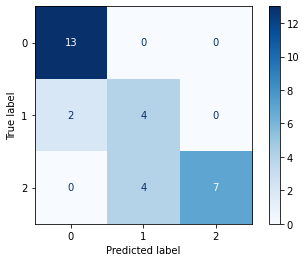

In [ ]:
plot_confusion_matrix(model,x_test,y_test,cmap=plt.cm.Blues)

## Classification Report
A Classification report is used to measure the quality of predictions from a classification algorithm. How many predictions are True, how many are False.

where:
- Precision:- Accuracy of positive predictions.
- Recall:- Fraction of positives that were correctly identified.
- f1-score:-  percent of positive predictions were correct
- support:- Support is the number of actual occurrences of the class in the specified dataset.

In [ ]:
print(classification_report(y_test,model.predict(x_test)))

              precision    recall  f1-score   support

           0       0.87      1.00      0.93        13
           1       0.50      0.67      0.57         6
           2       1.00      0.64      0.78        11

    accuracy                           0.80        30
   macro avg       0.79      0.77      0.76        30
weighted avg       0.84      0.80      0.80        30



**creator: Virat Chowdary, GitHub: [profile](https://github.com/viratchowdary21)**
